In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import optimizers, layers
from keras.models import Sequential
from keras.layers import Dense, Dropout
import os
import glob
from glob import glob
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
import cv2
import random
from matplotlib import pyplot as plt
from keras.models import Sequential
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
import pandas as pd
from sklearn.decomposition import PCA

base_dir = r'C:\Users\admin\OneDrive - 한양대학교\dataset\image'

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')
print("gittest")
train_LOS_dir = os.path.join(train_dir, 'LOS')
train_NLOS_dir = os.path.join(train_dir, 'NLOS')
val_LOS_dir = os.path.join(val_dir, 'LOS')
val_NLOS_dir = os.path.join(val_dir, 'NLOS')
test_LOS_dir = os.path.join(test_dir, 'LOS')
test_NLOS_dir = os.path.join(test_dir, 'NLOS')

print(len(os.listdir(train_LOS_dir)))
print(len(os.listdir(train_NLOS_dir)))
print(len(os.listdir(val_LOS_dir)))
print(len(os.listdir(val_NLOS_dir)))
print(len(os.listdir(test_LOS_dir)))
print(len(os.listdir(test_NLOS_dir)))



10500
10500
1750
1750
1750
1750


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator( rescale = 1.0/255. )
val_datagen  = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                  batch_size=64,
                                                  class_mode='categorical',
                                                  target_size=(32, 32))
validation_generator =  val_datagen.flow_from_directory(val_dir,
                                                       batch_size=64,
                                                       class_mode  = 'categorical',
                                                       target_size = (32, 32))
test_generator =  test_datagen.flow_from_directory(test_dir,
                                                       batch_size=64,
                                                       class_mode  = 'categorical',
                                                       target_size = (32, 32))

Found 21000 images belonging to 2 classes.
Found 3500 images belonging to 2 classes.
Found 3500 images belonging to 2 classes.


In [14]:
model = Sequential()
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(layers.Dense(2, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 30, 30, 128)       3584      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 13, 13, 64)        73792     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 4, 4, 32)          18464     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 2, 2, 32)          9248      
_________________________________________________________________
dropout_6 (Dropout)          (None, 2, 2, 32)         

In [15]:
adam = keras.optimizers.Adam(lr=0.001)
es = [EarlyStopping(monitor ='val_loss',mode='min',patience =20), ModelCheckpoint(filepath='best_model.h5',monitor='val_loss',save_best_only=True)]

model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
hist = model.fit(train_generator, epochs=20, batch_size=128, validation_data= validation_generator ,callbacks=[es])

Epoch 1/20
329/329 [==============================] - 115s 350ms/step - loss: 0.5489 - accuracy: 0.7102 - val_loss: 0.4750 - val_accuracy: 0.7749
Epoch 2/20
329/329 [==============================] - 98s 298ms/step - loss: 0.4821 - accuracy: 0.7671 - val_loss: 0.4642 - val_accuracy: 0.7743
Epoch 3/20
329/329 [==============================] - 97s 294ms/step - loss: 0.4673 - accuracy: 0.7771 - val_loss: 0.4513 - val_accuracy: 0.7786
Epoch 4/20
329/329 [==============================] - 95s 288ms/step - loss: 0.4650 - accuracy: 0.7793 - val_loss: 0.4495 - val_accuracy: 0.7809
Epoch 5/20
329/329 [==============================] - 94s 287ms/step - loss: 0.4579 - accuracy: 0.7845 - val_loss: 0.4383 - val_accuracy: 0.7914
Epoch 6/20
329/329 [==============================] - 95s 288ms/step - loss: 0.4556 - accuracy: 0.7845 - val_loss: 0.4372 - val_accuracy: 0.7929
Epoch 7/20
329/329 [==============================] - 95s 290ms/step - loss: 0.4506 - accuracy: 0.7866 - val_loss: 0.4383 - val_a

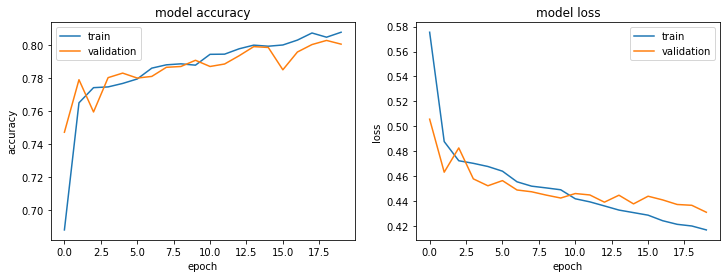

In [34]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])

plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'])

In [98]:
import seaborn as sns
from tensorflow.keras import backend as K
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

X_test = []
y_test = []

for X,y in train_generator:
    X_test.append(X)
    y_test.append(y)
#cnn evaluation_process
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=64)
y_pred = model.predict(X_test)
y_pred = np.ceil(y_pred-0.5)
cf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

#knn evaluation_process
layerIndex = 8
func = K.function([model.get_layer(index=0).input], model.get_layer(index=layerIndex).output)
layerOutput = func([X])  # input_data is a numpy array

X_train2,X_test2,y_train2,y_test2 = train_test_split(layerOutput, y_test ,test_size=0.3,random_state=1004)

63/63 [==============================] - 1s 18ms/step - loss: 0.4198 - accuracy: 0.8040


In [99]:
classifier = KNeighborsClassifier(n_neighbors=150)
classifier.fit(X_train2, y_train2)

y_pred2 = classifier.predict(X_test2)
cf_matrix2 = confusion_matrix(y_test2, y_pred2)

#confusion matrix
print(str(loss_and_metrics))
print(str(cf_matrix))
print(str(cf_matrix2))
print(classification_report(y_test, y_pred))
print(classification_report(y_test2, y_pred2))

[0.4198485314846039, 0.8040000200271606]
[[1799  171]
 [ 613 1417]]
[[3775  389]
 [1155 3081]]
              precision    recall  f1-score   support

           0       0.75      0.91      0.82      1970
           1       0.89      0.70      0.78      2030

   micro avg       0.80      0.80      0.80      4000
   macro avg       0.82      0.81      0.80      4000
weighted avg       0.82      0.80      0.80      4000
 samples avg       0.80      0.80      0.80      4000

              precision    recall  f1-score   support

           0       0.77      0.91      0.83      4164
           1       0.89      0.73      0.80      4236

    accuracy                           0.82      8400
   macro avg       0.83      0.82      0.81      8400
weighted avg       0.83      0.82      0.81      8400



<AxesSubplot:>

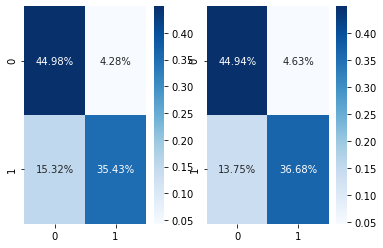

In [101]:
fig, ax = plt.subplots(1,2)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt = '.2%', cmap='Blues' ,ax=ax[0])
sns.heatmap(cf_matrix2/np.sum(cf_matrix2), annot=True, fmt = '.2%', cmap='Blues',ax=ax[1])